# Review Text Length and Ratings Experiment

Team BoxCoxRox (Team 17):  N. Abramson, M. Kunnen, K. Matisko, K. McCanless, M. Porter and S. Tay


## Introduction

The purpose of this notebook will be to explore the relationship between the length of reviews, and the number of stars given in a review.  If there appears to be a positive correlation, then it may make sense to use review length as a "tie breaker" when it comes to determinig the absolute raking of products based on user "stars."

For statistical purposes, we will begin with the following null hypothesis, and hope to reject it.

H_o: Higher product ratings (stars) are not correlated with the length of review text.

The following code will load the necessary libraries:



In [1]:
%%capture
!pip install numpy
!pip install statsmodels
!pip install matplotlib
!pip install sqlite3

The following code will import the required libraries and load the data.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Results into a pandas DataFrame
df_raw = pd.read_csv("ranking_output.csv")
print(df_raw.describe())
print("Data Loaded.")


               index  overall_average  overall_count  overall_stdev  \
count  198402.000000    198402.000000  198402.000000  198402.000000   
mean    99200.500000         4.010195      32.975892       0.673322   
std     57273.868391         1.067762     212.664904       0.675562   
min         0.000000         1.000000       1.000000       0.000000   
25%     49600.250000         3.500000       1.000000       0.000000   
50%     99200.500000         4.285714       3.000000       0.500000   
75%    148800.750000         5.000000      10.000000       1.307418   
max    198401.000000         5.000000   26994.000000       2.000000   

       average_length_of_review_text           rank     percentile  
count                  198402.000000  198402.000000  198402.000000  
mean                       40.888437   99200.500000       0.500003  
std                        40.688312   57273.868391       0.288676  
min                         1.000000       0.000000       0.000005  
25%            

## Method

In order to increase the number of valid reviews, the following code will limit test dataset to just those reviews that are verified and have a length betwenn 18 and 50 (the middle 50% of the data) characters.  Histograms are displayed to give an idea of the distribution of the length of review text as well as the number of stars given as part of reviews.

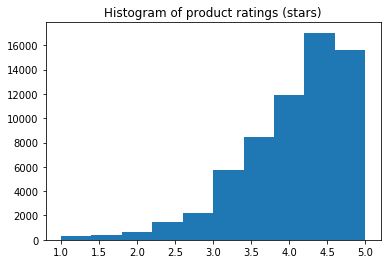

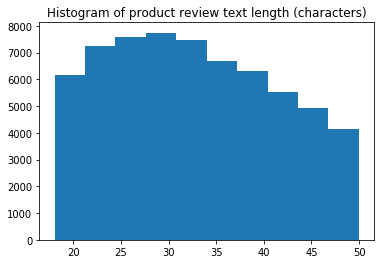

In [3]:
df = df_raw[df_raw['average_length_of_review_text']>18]
df = df[df['average_length_of_review_text']<50]
df = df[df['overall_count']>2]

plt.hist(df['overall_average'])
plt.gca().set_title("Histogram of product ratings (stars)")
plt.show()
plt.hist(df['average_length_of_review_text'])
plt.gca().set_title("Histogram of product review text length (characters)")
plt.show()

Again, the goal of this experiment is to see if there is a strong correlation between product average ranking and  average review length.  To see if there is a relationship, we now graph a random sample of 10000 products.  For each product we will plot the product average ranking vs average review length.  For this experiment, our dependent variable is average product ranking (y), and the independent variable (x) is average overall review length.

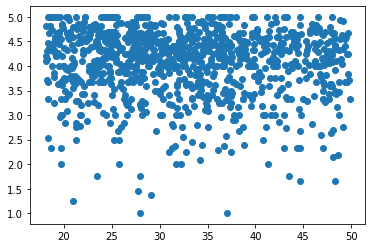

In [4]:
df_plot = df.sample(1000)

plt.scatter(df_plot['average_length_of_review_text'], df_plot['overall_average'])
plt.show()

At this most basic level, it does not appear that overall ranking is even remotely correlated with the number of stars.  The only possible exception might be the sum of the characters, however that number is artifically inflated due to the fact that the rakings are heavily skewed to the left.  (In other words, most products receive 5 stars.)

A lack of a strong correlation can easily be confirmed with a simple regression...

                            OLS Regression Results                            
Dep. Variable:        overall_average   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.698
Date:                Fri, 09 Apr 2021   Prob (F-statistic):             0.0304
Time:                        13:23:08   Log-Likelihood:                -1054.9
No. Observations:                1000   AIC:                             2114.
Df Residuals:                     998   BIC:                             2124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

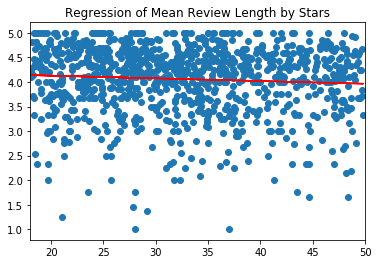

In [5]:
import statsmodels.api as sm
import math
X = df_plot['average_length_of_review_text']
Y = df_plot['overall_average']
x = sm.add_constant(X)
model = sm.OLS(Y,x)
results = model.fit()
m = results.params[1]
b = results.params[0]
plt.scatter(X,Y)
plt.xlim([18,50])
plt.gca().set_title("Regression of Mean Review Length by Stars")
plt.plot(x, m*x+b, color='red')
print(results.summary())


## Results

As can be seen in the graph and summary above, not only is the R-Squared value of this data extremely low, the  coefficient of average_length_of_review_text, while statistically significant with a P value of 0.03, is actually negative!  We would expect this to be positive.  

In this case, we have shown that while the review text length and the number of stars are correlated, they are NOT positively correlated.

In other words, we have failed to show that higher mean review text length is associated with consistenly higher ratings.